# Linear Regression
## California Housing Price Prediction
## Introduction
This is a homework assignment for the __[Machine Learning For Absolute Beginners](https://mlearnfab.github.io/web/intro.html)__ class where linear regression is used to predict housing prices in California.
## Problem Statement
Build a model using linear regression that will accurately predict California housing prices
## Input
The cleaned dataset from the ca_housing_data_cleaning.ipynb notebook
## Output
1. A linear regression model that predicts the prices of houses using the California Housing Dataset
2. Metrics that describe the performance of the linear model

MIT License

Copyright (c) 2022 UFO Software, LLC

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

## Read in the cleaned data

In [2]:
data_dir = 'data'
df = pd.read_csv(data_dir+'/calhousing_clean.csv')
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,4.526
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,3.585
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,3.521
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,3.413
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20417,1.5603,25,5.045455,1.133333,845,2.560606,39.48,-121.09,0.781
20418,2.5568,18,6.114035,1.315789,356,3.122807,39.49,-121.21,0.771
20419,1.7000,17,5.205543,1.120092,1007,2.325635,39.43,-121.22,0.923
20420,1.8672,18,5.329513,1.171920,741,2.123209,39.43,-121.32,0.847


## Create the model using Cross-Validation
### Cross-Validation 
Cross-validation allows one to estimate the robustness of a predictive model by performing multiple train, test splits and evaluating the model with different distributions of the data.  Averaging the error or score of the models gives an estimate of the variability of the model's ability to generalize.
### Standard Scalar
The Standard Scalar scales each feature individually so they have a mean of 0 and a standard deviation of 1.  Using the Standard Scalar with linear regression allows the model to converge to a solution faster.

In [3]:
# extract the features and target
data = df.drop(columns = ['Price'])
target = df.Price

# build the pipeline so that for each iteration of the cross-validation the data will be preprocessed before the model is generated
linear_regression = make_pipeline(StandardScaler(),
                                  LinearRegression())

# build 10 models each with different train / test splits
cv_results = cross_validate(linear_regression, data, target,
                            cv=10, scoring="r2",
                            return_train_score=True,
                            return_estimator=True)

# print the average training score and standard deviation of the models
train_score = cv_results["train_score"]
print(f"Mean R2 of linear regression model on the train set:\n"
      f"{train_score.mean():.3f} ± {train_score.std():.3f}")

# print the average test score and standard deviation of the models
test_score = cv_results["test_score"]
print(f"Meean R2 of linear regression model on the test set:\n"
      f"{test_score.mean():.3f} ± {test_score.std():.3f}")

Mean R2 of linear regression model on the train set:
0.665 ± 0.008
Meean R2 of linear regression model on the test set:
0.577 ± 0.049


### The train and test scores for each iteration of the cross validation

In [4]:
cv_results["train_score"]

array([0.6690158 , 0.65425227, 0.67444806, 0.6689655 , 0.66036891,
       0.66987639, 0.65917761, 0.67628172, 0.65492759, 0.6604395 ])

In [5]:
cv_results["test_score"]

array([0.55764552, 0.64918494, 0.54948308, 0.58866066, 0.65163572,
       0.59406709, 0.51370939, 0.52662954, 0.52207065, 0.62070264])

## Coefficients 
Create a boxplot of the coefficients for each feature to show the variability of each coefficient for the models generated by the cross-validation.

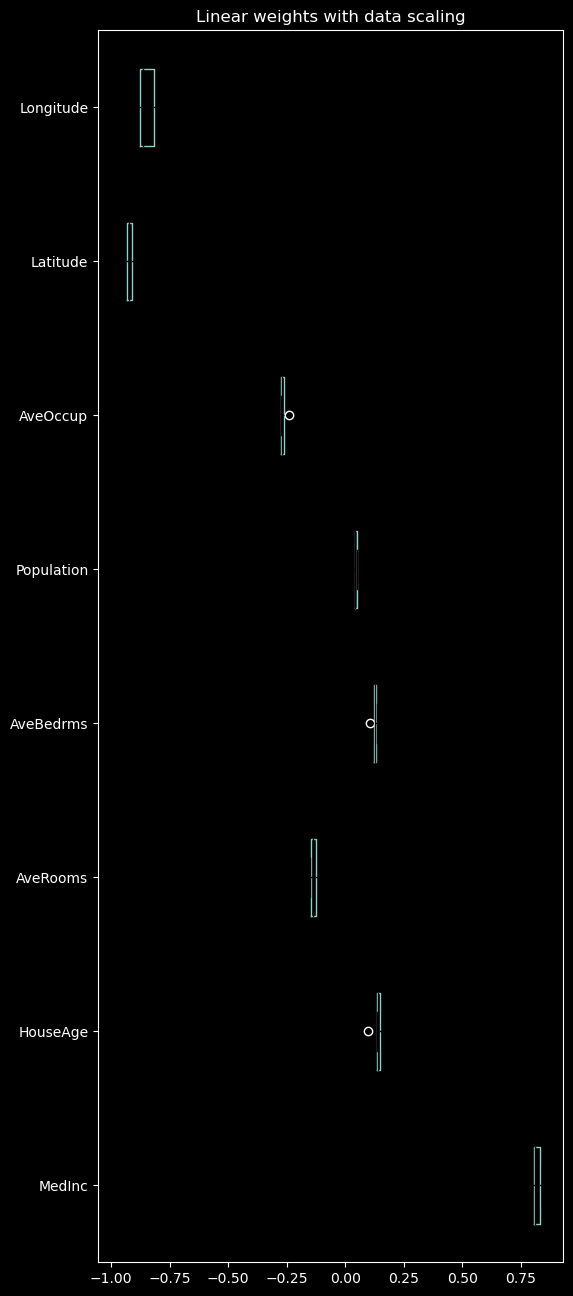

In [6]:
coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_linear = pd.DataFrame(coefs, columns=data.columns)

color = {"whiskers": "black", "medians": "black", "caps": "black"}

plt.style.use("dark_background");
weights_linear.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Linear weights with data scaling")

### The coefficients for each iteration of cross-validation

In [7]:
weights_linear

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.809504,0.155825,-0.135651,0.127596,0.044120,-0.274795,-0.964452,-0.916311
1,0.807949,0.143082,-0.120110,0.127954,0.039579,-0.270454,-0.906463,-0.844867
2,0.791677,0.134114,-0.092525,0.114421,0.036423,-0.238016,-0.924991,-0.876677
3,0.837167,0.139969,-0.144082,0.131631,0.040736,-0.258972,-0.944241,-0.875396
4,0.802710,0.138145,-0.131418,0.121470,0.048521,-0.245248,-0.936410,-0.876917
5,0.814342,0.144567,-0.149505,0.122053,0.051906,-0.273432,-0.924084,-0.850134
6,0.835309,0.149291,-0.142182,0.132113,0.049330,-0.274767,-0.891744,-0.809384
7,0.812862,0.096971,-0.117856,0.106633,0.028625,-0.264779,-0.900073,-0.777238
8,0.794183,0.136487,-0.147854,0.135492,0.041935,-0.266228,-0.917006,-0.793240
9,0.840676,0.148236,-0.143841,0.130443,0.047791,-0.275408,-0.923680,-0.880982


## Remove Population
The coefficient for Population is close to zero so we should be able to remove it.

Removing Population the training R2 score decreases but the testing R2 score remains the same which implies that the model is overfitting less.  A rule of thumb is that the simplest model is the best so the model that does not include Population as a feature is the preferred model.

In [8]:
data = df.drop(columns = ['Population', 'Price'])

cv_results = cross_validate(linear_regression, data, target,
                            cv=10, scoring="r2",
                            return_train_score=True,
                            return_estimator=True)

train_score = cv_results["train_score"]
print(f"Mean R2 score of linear regression model on the train set:\n"
      f"{train_score.mean():.3f} ± {train_score.std():.3f}")

test_score = cv_results["test_score"]
print(f"Mean R2 error of linear regression model on the test set:\n"
      f"{test_score.mean():.3f} ± {test_score.std():.3f}")

Mean R2 score of linear regression model on the train set:
0.664 ± 0.008
Mean R2 error of linear regression model on the test set:
0.577 ± 0.049


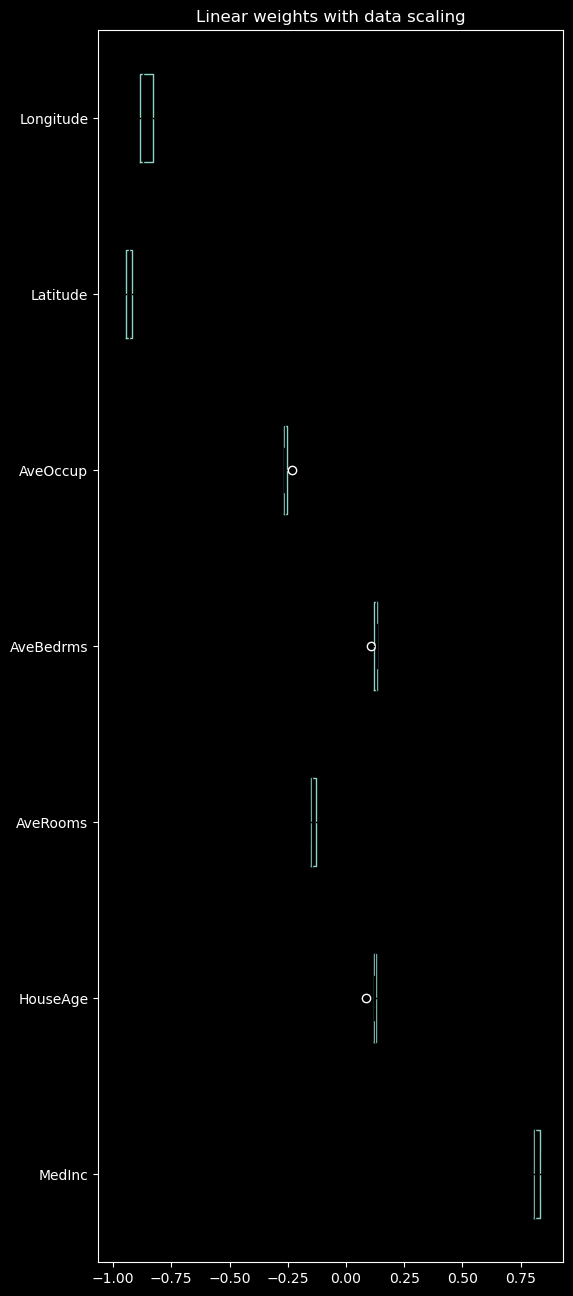

In [9]:
coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_linear = pd.DataFrame(coefs, columns=data.columns)

color = {"whiskers": "black", "medians": "black", "caps": "black"}

plt.style.use("dark_background");
weights_linear.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Linear weights with data scaling")